In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt


url = 'https://finance.naver.com/item/sise_day.nhn?code=029780&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

# BeautifulSoup 생성자 첫번째 인수로 HTML/XML 페이지를 넘겨주고, 두번째 인수로 페이지를 파싱할 방식을 넘겨준다.
bs = BeautifulSoup(html, 'lxml')

# find 함수를 통해 'pgRR'인 'td'태그를 찾으면, 결과값은 'bs4.element.Tag'타입으로 pgrr 변수에 반환한다.
# pgRR = Page Right Right 맨 마지막 페이지를 의미한다.
pgrr = bs.find('td', class_='pgRR')


# 삼성카드 전체 페이지 수를 구하려면 pdRR 클래스 속성값으로 <td>하위의 <a> href 속성값을 구한다.
# pfgg.a['href']를 출력하면 href의 속성값인 item/sise.naver?code=029780&page=1 문자열을 얻을 수 있다.
s = str(pgrr.a['href']).split('=')

last_page = s[-1]  

# 빈 데이터프레임 생성
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=029780'  

for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

df = df.dropna()
print(df)

C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\3755575147.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\3755575147.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\3755575147.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\3755575147.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[

            날짜       종가     전일비       시가       고가       저가        거래량
1   2022.12.23  32850.0   250.0  32600.0  32850.0  32550.0   111395.0
2   2022.12.22  32600.0   100.0  32500.0  32650.0  32400.0    63518.0
3   2022.12.21  32500.0    50.0  32600.0  32650.0  32350.0    61073.0
4   2022.12.20  32450.0     0.0  32250.0  32550.0  32250.0    54933.0
5   2022.12.19  32450.0    50.0  32250.0  32500.0  32250.0    40306.0
..         ...      ...     ...      ...      ...      ...        ...
9   2007.07.03  59700.0  2700.0  57600.0  59800.0  57000.0  1067955.0
10  2007.07.02  57000.0   200.0  56500.0  57500.0  56200.0   605419.0
11  2007.06.29  56800.0  1200.0  58000.0  59800.0  56600.0  1161880.0
12  2007.06.28  58000.0  3200.0  60500.0  60800.0  57700.0  1761128.0
13  2007.06.27  61200.0  1000.0  62200.0  63200.0  58300.0  6559871.0

[3830 rows x 7 columns]


C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\3755575147.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\3755575147.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])


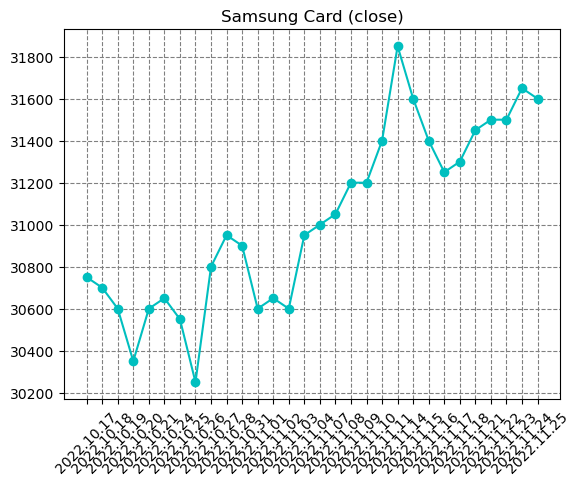

In [16]:
# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]  
df = df.sort_values(by='날짜')  

# 날짜, 종가 컬럼으로 차트 그리기
plt.title('Samsung Card (close)')
plt.xticks(rotation=45)  
plt.plot(df['날짜'], df['종가'], 'co-') 
plt.grid(color='gray', linestyle='--')
plt.show()

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\1712315728.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\1712315728.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\1712315728.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
C:\Users\kwonk\AppData\Local\Temp\ipykernel_56860\1712315728.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[